In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [3]:
import datetime

In [4]:
def to_dict(self):
        return {
            column.name: getattr(self, column.name)
            if not isinstance(getattr(self, column.name), datetime.datetime)
            else getattr(self, column.name).isoformat()
            for column in self.__table__.columns
        }

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_
from sqlalchemy import distinct

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

q = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23")).all()

data = []
for row in q:
     data.append(row._asdict())
        
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

scores = session.query(Measurement.date, Measurement.prcp).order_by(
            Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df1 = pd.DataFrame(data, columns=["date", "prcp"])

df1.set_index('date')

df1.head()

# Sort the dataframe by date



,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [40]:
scores

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

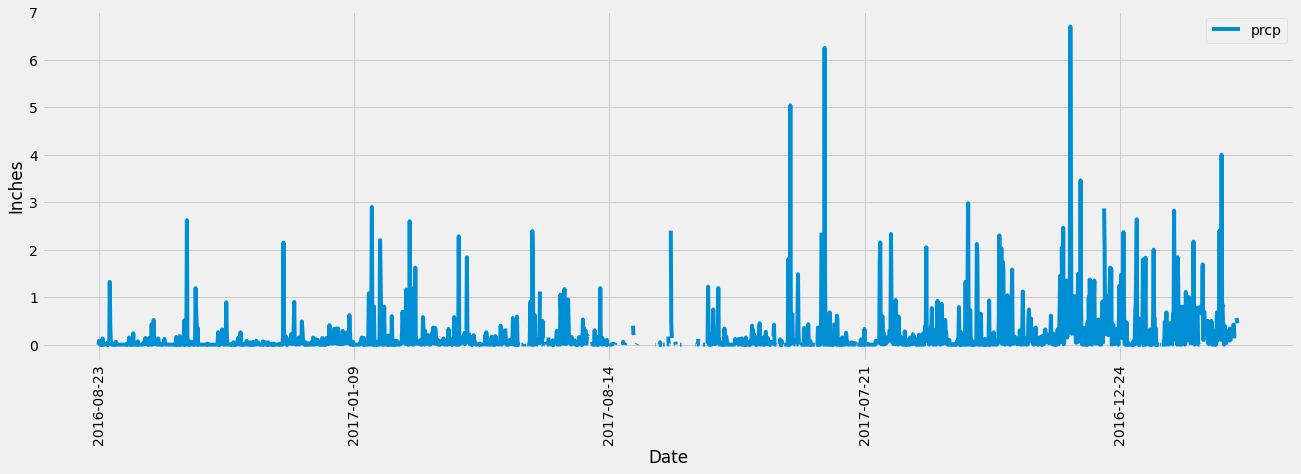

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data

df1.plot(x='date', y='prcp', rot=90, figsize=(20,6))
plt.xlabel("Date")
plt.ylabel("Inches")

plt.savefig("Images/precipitation.png")

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [66]:
# Design a query to show how many stations are available in this dataset?

q = session.query(func.count(Station.station)).all()



print(q)



[(9,)]


In [69]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [Measurement.station, 
       func.count(Measurement.station)]

totalcount = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
totalcount

#measurement station, count func.count then mes station. then group by, then order by desc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

min_temp = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

min_temp
                                                                                 
#tobs query min max and average. func.min/func.max/func.avg. Filter == USC00519281 

[('USC00519281', 54.0)]

In [75]:
max_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

max_temp

[('USC00519281', 85.0)]

In [76]:
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

avg_temp

[('USC00519281', 71.66378066378067)]

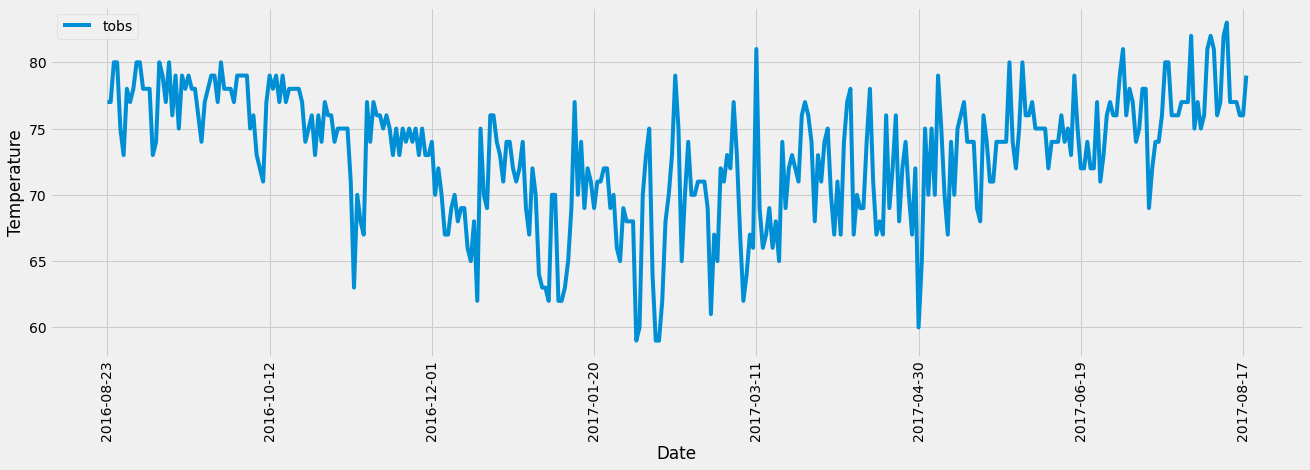

In [86]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

q2 = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281", Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23").all()

data2 = []
for row in q2:
     data2.append(row._asdict())

df2 = pd.DataFrame(data2, columns=["date", "tobs"])

df2.set_index('date')


df2.plot(x='date', y='tobs', rot=90, figsize=(20,6))
plt.xlabel("Date")
plt.ylabel("Temperature")

plt.savefig("Images/Temp.png")

#df.plot.hist query on only last year